# Distributions

- central tendency

- range for most the data

- bounds

In [1]:
library('tidyverse')
options(repr.plot.width=4, repr.plot.height=3)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.3     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



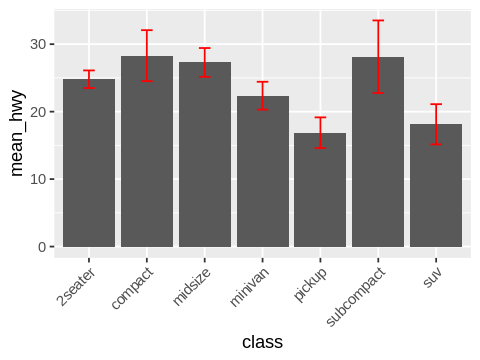

In [2]:
df = mpg %>%
    group_by(class) %>%
    summarize(mean_hwy = mean(hwy), sd_hwy = sd(hwy))

p = ggplot(df, aes(x = class))

p = p + geom_bar(aes(y = mean_hwy), stat = 'identity')

p = p + geom_errorbar(aes(ymin = mean_hwy + sd_hwy, ymax = mean_hwy - sd_hwy),
                      color = 'red', width = 0.2)

p = p + theme(axis.text.x = element_text(angle = 45, hjust = 1))

p

- no lower (or upper) bound
- chart must include zero
- not clear what the range represents

# Boxplot

- what do you think the geom for boxplots is called?

In [3]:
# ?geom_boxplot

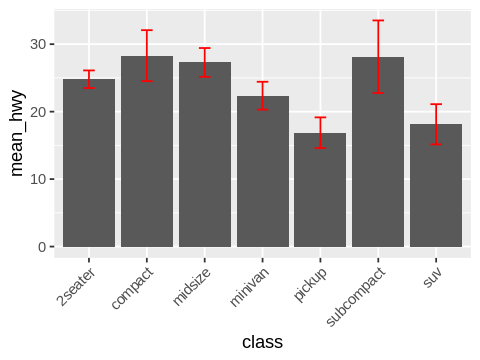

In [4]:
p

In [5]:
mpg %>% head

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact


In [6]:
# p = ggplot(mpg, aes(x = ?, y = ?))

# p = p + geom_?()

# p

- central tendency?
- range for most the data?
- bounds?

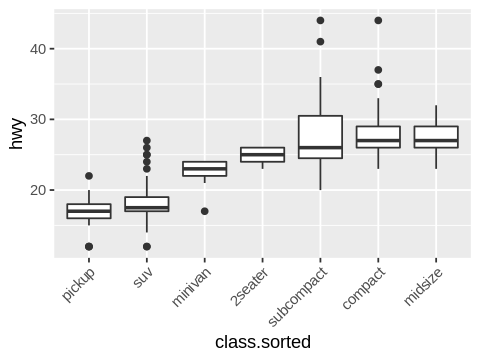

In [7]:
mpg.sorted = mpg %>%
    mutate(class.sorted = fct_reorder(class, hwy))

p = ggplot(mpg.sorted, aes(x = class.sorted, y = hwy))

p = p + geom_boxplot()

p = p + theme(axis.text.x = element_text(angle = 45, hjust = 1))

p

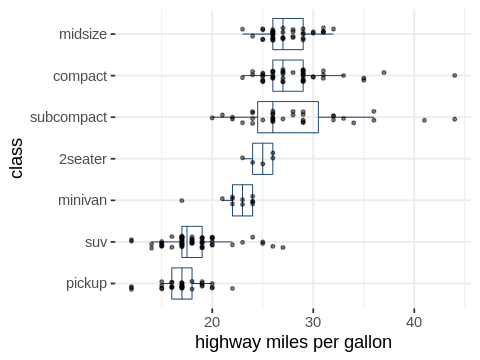

In [8]:
p = ggplot(mpg.sorted, aes(x = class.sorted, y = hwy))

p = p + geom_boxplot(fill = NA, outlier.shape = NA, color = '#003366', fatten = 1, lwd = 0.25)

p = p + geom_point(position = position_jitter(h = 0, w = 0.15), size = 0.75, alpha = 0.5)

p = p + theme_bw()

p = p + theme(panel.border = element_blank())

p = p + labs(x = 'class', y = 'highway miles per gallon')

p = p + coord_flip()

p

# Histograms

- what do you think the geom is named for histograms?

In [2]:
diamonds %>% head

carat,cut,color,clarity,depth,table,price,x,y,z
<dbl>,<ord>,<ord>,<ord>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
0.23,Ideal,E,SI2,61.5,55,326,3.95,3.98,2.43
0.21,Premium,E,SI1,59.8,61,326,3.89,3.84,2.31
0.23,Good,E,VS1,56.9,65,327,4.05,4.07,2.31
0.29,Premium,I,VS2,62.4,58,334,4.20,4.23,2.63
0.31,Good,J,SI2,63.3,58,335,4.34,4.35,2.75
0.24,Very Good,J,VVS2,62.8,57,336,3.94,3.96,2.48


We want to see the range of price...

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



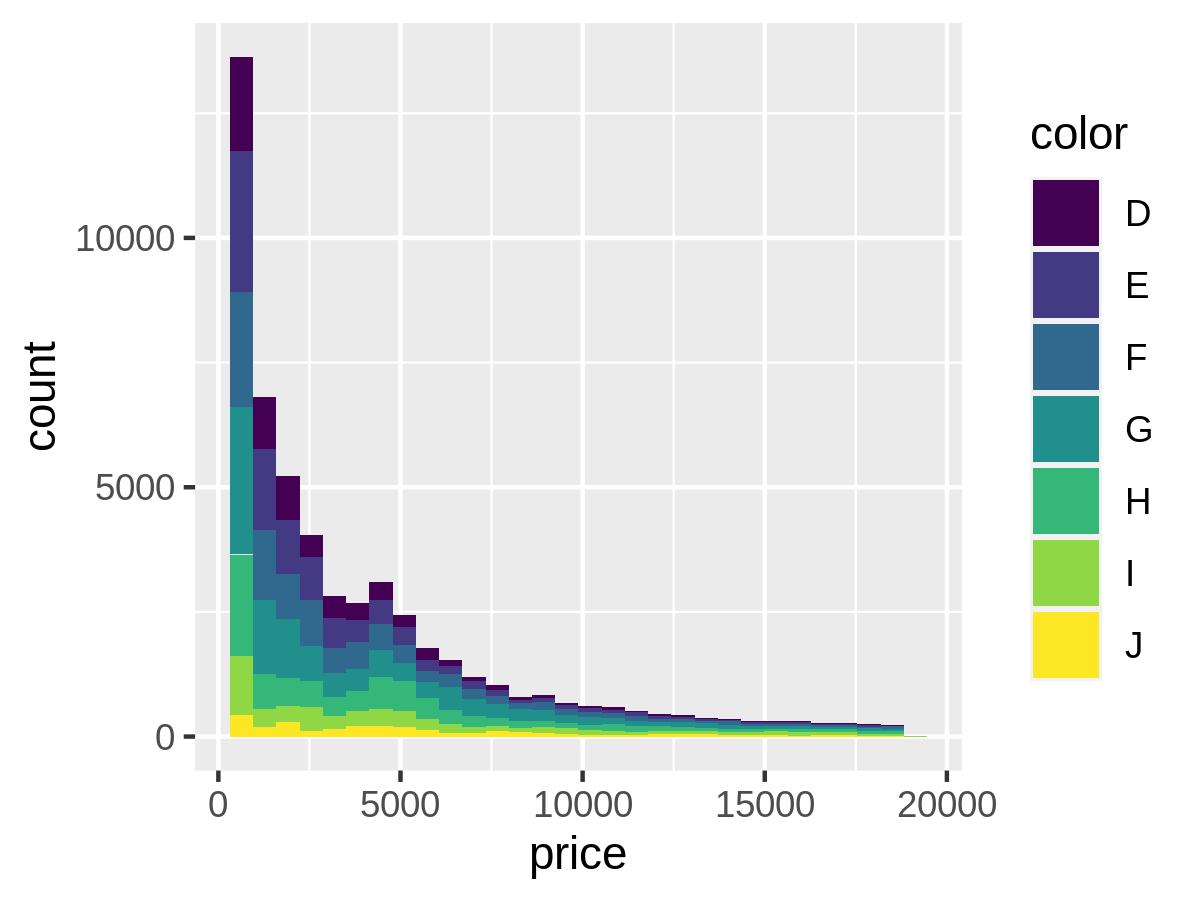

In [15]:
p = ggplot(diamonds, aes(x = price, fill = color)) # the color command shows the colors of the groups stacked on each other

p = p + geom_histogram()
p

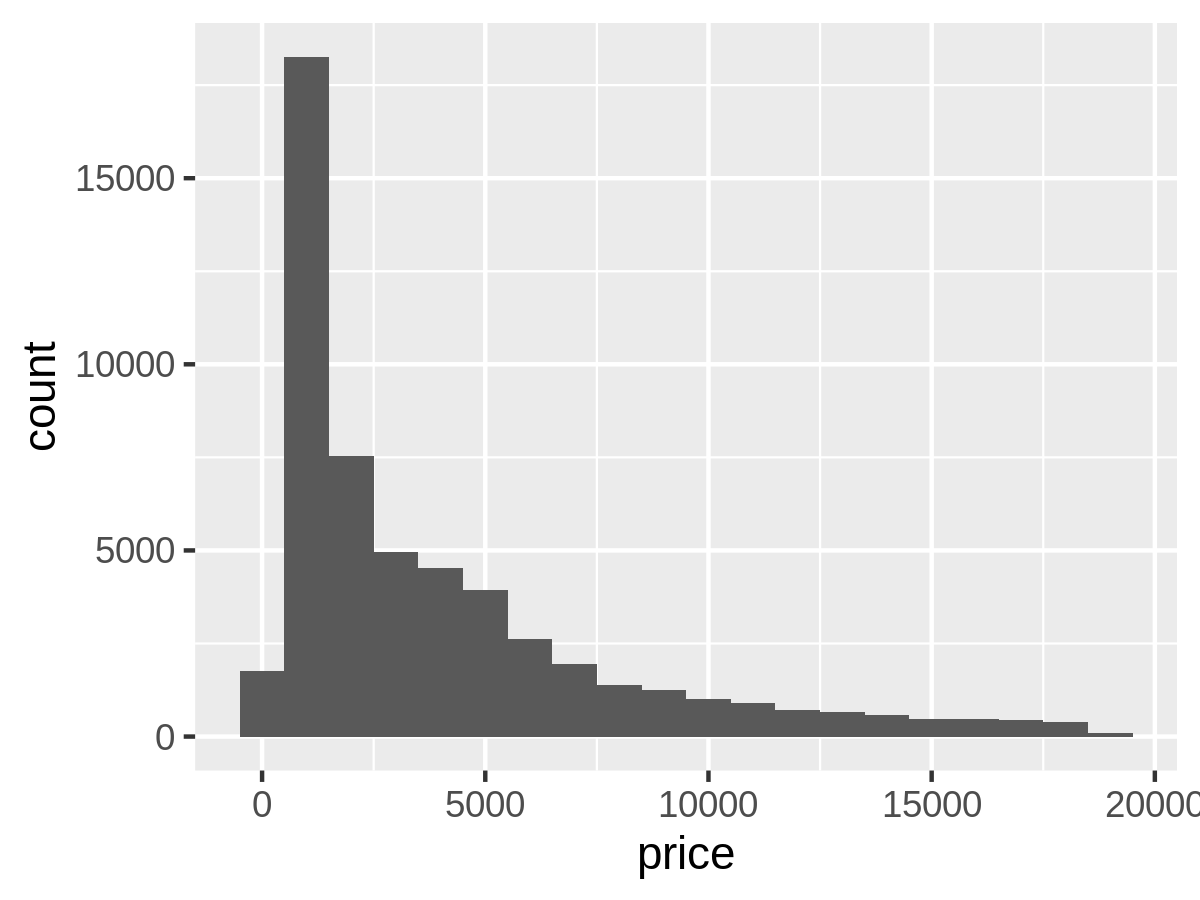

In [11]:
p = ggplot(diamonds, aes(x = price))

p = p + geom_histogram(binwidth = 1000)

p

- adjust with `bins` and `binwidth` argument.

# KDE

- what do you think the geom is named for KDE plots (this one is not as clear)?

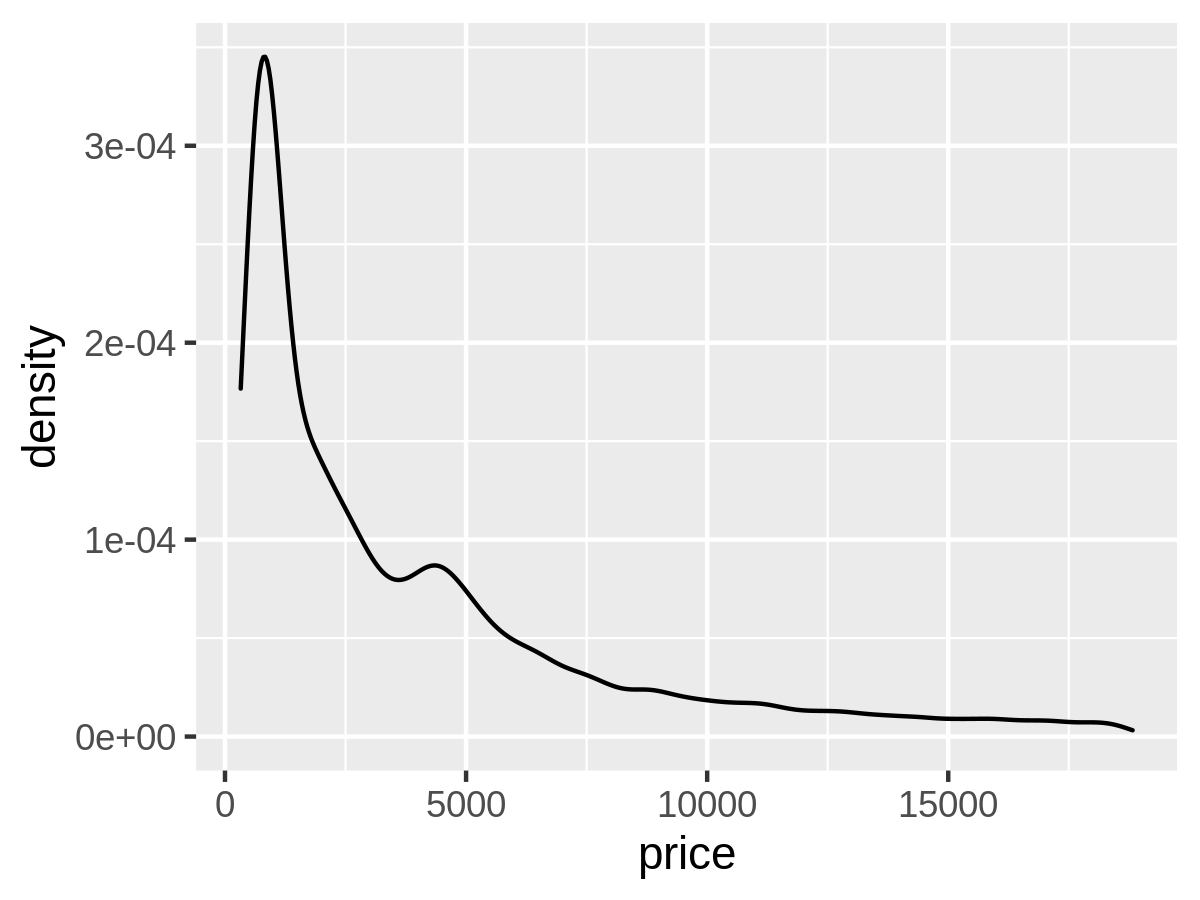

In [12]:
p = ggplot(diamonds, aes(x = price))

p = p + geom_density()

p

- add `fill` with alpha

# Rugs

- Can help us include all values and see bounds.
- Not great with large number of points but you can adjust alpha.

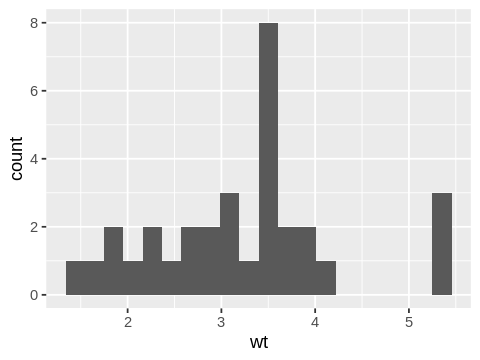

In [12]:
p = ggplot(mtcars, aes(x = wt))

p = p + geom_histogram(bins = 20)

p

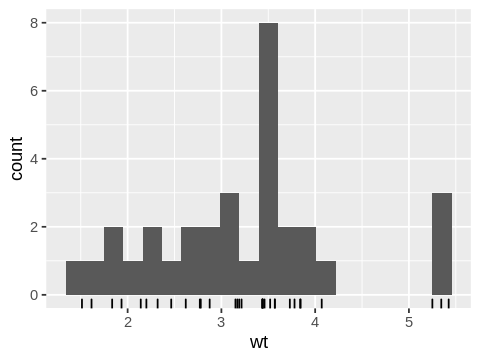

In [13]:
p + geom_rug()

# ECDF next lecture

- https://ericmjl.github.io/blog/2018/7/14/ecdfs/